# Background and Theory for 6670 Term Project

### Jonah Shaw, 2021/11/17

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,glob,sys
import xarray as xr

## Theory Overview

Planetary albedo describes the fraction of incident solar radiation that is reflected back into space. Bright surfaces have a high albedo, effectively cooling the surface. Albedo changes modify the energy budget of the planet, leading to a cascade of climate feedbacks. In the Arctic, for example, the loss of sea ice drives a strong positive feedback that amplifies warming.

Sea ice largely controls albedo in the Arctic, but the relationship between sea ice concentration and albedo is non-linear. While the disappearance of sea ice exposes the dark ocean surface thus lowering the planetary albedo, the albedo of the ice itself also changes during the melt season. For example, fresh snow may be replaced with darker melt ponds on the ice surface. Additionally, other processes like clouds and water vapor feedbacks may also complicate the relationship between sea ice concentrations and the planetary albedo. Here, we explore two simple models for albedo non-linearity over the Arctic Ocean using inverse methods.

#### Simple Models for Arctic Albedo

In the Arctic Ocean, there is a strong contrast between the high albedo of sea ice and the low albedo of open water. If we ignore the effects of clouds and the atmosphere, the planetary albedo can be written as the sum of contributions from each surface:

$$ \alpha = \alpha_{ocean}f_{ocean} + \alpha_{ice}f_{ice}, $$

where $\alpha_{ocean}$ and $\alpha_{ice}$ are the albedo of open water and ice, and $f_{ocean}$ and $f_{ice}$ are the fraction of the surface covered by open water and ice, respectively. We assume only open water (ocean) and ice surfaces ($ 1 = f_{ocean} + f_{ice} $). The previous equation describes a zeroeth order model with constant sea ice albedo (Model 0) that we will use to benchmark the models presented below. While the albedo of open water can reasonably be assumed to be constant, non-linearities arise from changes in $\alpha_{ice}$ over the course of the melt season. We explore two simple models of this non-linearity: 

1) Fresh bright sea ice becomes darker as the surrounding ice begins to melt (i.e. $\alpha_{ice} \propto f_{ice} $). Our model assumes that sea ice albedo decreases linearly from a "new ice" albedo $\alpha_{newice}$ to an "old ice" albedo $\alpha_{oldice}$ as a function of the sea ice concentration:

$$ \alpha_{ice} = \alpha_{newice}f_{ice} + \alpha_{oldice} (1 - f_{ice}) $$

2) Fresh ice surfaces darken as the are exposed to solar radiation from the sun, beginning at the end of the Arctic winter. Similar to Model 1, sea ice albedo decreases linearly to an "old ice" albedo, but now as a function of time:

$$ \alpha_{ice} = \alpha_{newice}\left(1 - \frac{t - t_0}{\tau}\right) + \alpha_{oldice}\left(\frac{t - t_0}{\tau}\right), $$

where $t_0$ is the end of the Polar Night and $\tau$ is a time constant controlling the rate of albedo loss.

Plugging these expressions into Equation 1, we obtain forward models for Arctic albedo:

$$ \alpha = \alpha_{ocean}(1- f_{ice}) + [\alpha_{newice}f_{ice} + \alpha_{oldice} (1 - f_{ice})] f_{ice} = \alpha_{ocean}(1- f_{ice}) + \alpha_{newice}f_{ice}^2 + \alpha_{oldice} (f_{ice} - f_{ice}^2) $$

$$ \alpha = \alpha_{ocean}(1- f_{ice}) + [\alpha_{newice}\left(1 - \frac{t - t_0}{\tau}\right) + \alpha_{oldice}\left(\frac{t - t_0}{\tau}\right)] f_{ice} = \alpha_{ocean}(1- f_{ice}) + \alpha_{newice}f_{ice}\left[1 - \left(\frac{t - t_0}{\tau}\right)\right] + \alpha_{oldice}f_{ice}\frac{t - t_0}{\tau} $$

The first model is linear is $\alpha_{ocean}$, $\alpha_{newice}$, and $\alpha_{oldice}$. The second model is linear in $\alpha_{ocean}$, $\alpha_{newice}$, and $(\alpha_{newice}-\alpha_{oldice})/\tau$.

The zeroeth order model can be written as:

$$
\left(\begin{array}{cc} 
1-f_{ice_1} & f_{ice_1} \\
1-f_{ice_2} & f_{ice_2} \\
... & ... \\
1-f_{ice_N} & f_{ice_N} \\
\end{array}\right)
\left(\begin{array}{c} 
\alpha_{ocean} \\
\alpha_{ice}
\end{array}\right)
=
\left(\begin{array}{c} 
\alpha_1 \\
\alpha_2 \\
... \\
\alpha_N
\end{array}\right),
$$ 

Writing first forward model in the linear framework $\textbf{Gm} = \textbf{d}$ gives:

$$
\left(\begin{array}{ccc} 
1-f_{ice_1} & f_{ice_1}^2 & f_{ice_1} - f_{ice_1}^2 \\
1-f_{ice_2} & f_{ice_2}^2 & f_{ice_2} - f_{ice_2}^2 \\
... & ... & ... \\
1-f_{ice_N} & f_{ice_N}^2 & f_{ice_N} - f_{ice_N}^2 \\
\end{array}\right)
\left(\begin{array}{c} 
\alpha_{ocean} \\
\alpha_{newice} \\
\alpha_{oldice}
\end{array}\right)
=
\left(\begin{array}{c} 
\alpha_1 \\
\alpha_2 \\
... \\
\alpha_N
\end{array}\right),
$$ 

where we have $N$ total observations of albedo, sea ice concentration, and time. For the second forward model we have:

$$
\left(\begin{array}{ccc} 
1-f_{ice_1} & f_{ice_1} & -f_{ice_1}(t_1 - t_{0,1}) \\
1-f_{ice_2} & f_{ice_2} & -f_{ice_2}(t_2 - t_{0,2}) \\
... & ... & ... \\
1-f_{ice_N} & f_{ice_N} & -f_{ice_N}(t_N - t_{0,N}) \\
\end{array}\right)
\left(\begin{array}{c} 
\alpha_{ocean} \\
\alpha_{newice} \\
(\alpha_{newice}-\alpha_{oldice})/\tau
\end{array}\right)
=
\left(\begin{array}{c} 
\alpha_1 \\
\alpha_2 \\
... \\
\alpha_N
\end{array}\right),
$$ 

where $t_{0,n}$ is the melt start time for the $n\textrm{th}$ observation. Since we are only retrieving three model parameters, $\alpha_{oldice}$ and $\tau$ cannot be uniquely determined through the inversion process.

#### Model Simplifications

We note that these models are highly simplified and ignore important factors known to drive sea ice melt. Specifically, atmospheric water vapor concentrations are known to initiate melt by increasing downwelling longwave radiation at the ice surface (https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL069330) [cite others]. We focus on sunlight-initiated melt because it is easily incorporated into our linear model.

### Description of Data

We use monthly-mean observations from the CERES platform to calculate albedo. Albedo is calculated as the ratio of outgoing solar radiation to incoming solar radiation. We use monthly-mean observations from the NSIDC G02202 data product to obtain sea ice fraction. Since the CERES product has a coarser (1 deg. > 0.25 deg.) resolution, we interpolate the NSIDC product to the CERES grid before making calculations. Data from the melt season (March - September) is sub-selected and observations are assumed to occur on the 15th day of each month when calculating $t_n$. As a result $t=0$ corresponds to March 15th. We restrict our analysis to observations within the NSIDC sea ice mask poleward of $70^{\circ}\textrm{N}$ to focus on sea ice albedo processes in the main portion of the Arctic Ocean where similar melt processes are in action.

### Calculation of sunlight-initiated melt start

In Model 2, sea ice albedo modifications are assumed to be initiated by solar insolation following the solar winter. Since this start date is a prescribed variable, we must account for two factors in determining it: 1. Lower latitudes experience the end of the Polar Night before higher latitudes. 2. The threshold for solar insolation initiating melt is greater than zero, so we cannot simply select the end of polar night when determining $t_{0,n}$. We account for these factors by calculating $t_{0,n}$ as the time when the average solar insolation exceeds some threshold $F_{melt}$. We test several values for $F_{melt}$. Because Model 2 would increase the albedo past the $\alpha_{newice}$ value for observations prior to the insolation threshold, we remove this subset of observations before calculating solutions for the model parameters.

Chapter 2 of _An Introduction to Atmospheric Radiation_ by K.N. Liou provides an equation for the average solar insolation as a function of the solar constant $S$, latitude ($\phi$), solar inclination angle $\delta$, and normalized solar distance ($a/r$). This complex relationship is described by Liou's equation 2.2.21:  

$$ Q \cong \frac{S}{\pi} (\frac{a}{r})^2 (\sin(\phi)\sin(\delta)H + \cos(\phi)\cos(\delta)\sin(H)). $$


Additional variables in Equation 2.2.21 are calculated using the following equations.

Equation 2.2.2:

$$ \cos(H) = -\tan(\phi)\tan(\delta) $$

Equation 2.2.9:  

$$ (\frac{a}{r})^2 = \sum_{n=0}^2 (a_n \cos(nt) + b_n \sin(nt)) $$

Equation 2.2.10:

$$ \delta = \sum_{n=0}^{3} \left(c_n \cos(nt) + d_n \sin(nt) \right) $$

where $\delta$ is the solar inclination angle (SZA at the equator), $\phi$ is the latitude in radians of the $t$th day of the year is $$ t = 2πd/365 $$

Clearly, recovering an analytic expression for the day of the year when insolation crosses a specific threshold is non-trivial or impossible. It will be easier to just calculate the insolation for each day of the year and find minimize the error relative to the threshold with a simple search (one dimension so no need for advanced methods). To avoid selecting a day in the fall (where the threshold is cross from the other direction), I will just calculate insolation values for the first half of the year.

### Inverse Solution Methods

Since the problem is clearly overconstrained (many individual observations and few model parameters), we will employ a weighted least squares solution:  

$$ \textbf{m}^{est} = [\textbf{G}^\textrm{T} \textbf{W}_e \textbf{G}]^{-1} \textbf{G}^\textrm{T} \textbf{W}_e \textbf{d}. $$

The weighting matrix can incorporate uncertainties in both the observations as well as the parameters of the forward model. Followings Rodgers et al., we expand $\textbf{W}_e$ as:

$$ \textbf{W}_e = \left(\textbf{S}_d + \textbf{S}_b'\right)^{-1}, $$

where $\textbf{S}_d$ is the covariance of the observations and $\textbf{S}_b'$ is the covariance of the model parameter vector $\textbf{b}$ translated into observation-space. $\textbf{S}_b'$ is calculated using:

$$ \textbf{S}_b' = \textbf{K}_b \textbf{S}_b \textbf{K}_b^{\textrm{T}}, $$

where $\textbf{K}_b$ is the Jacobian of the forward model with respect to $\textbf{b}$. Since the date of melt onset $t_{0,n}$ is uncertain, we wish to propagate this uncertainty through to our retrieved parameters. $\textbf{K}_b$ is then a single $N\times 4$ matrix with entries:

$$ \textbf{K}_{b,(i,j)} = \frac{\partial\textbf{G}_{i,j}}{\partial t_{0,i}}. $$

The resulting matrix is simply:

$$
\textbf{K}_{b} =
\left(\begin{array}{cccc} 
0 & 0 & f_{ice_1} \\
0 & 0 & f_{ice_2} \\
... & ... & ...  \\
0 & 0 & f_{ice_N} \\
\end{array}\right)
$$ 

I can either make $\textbf{S}_b$ a diagonal matrix or not. Best to start simple but also not tough to calculate some kind of idealize covariance.

#### Idealized Covariance Matrices

Neither observations nor uncertainties are uncorrelated between lat-lon gridcells. Specifically, we expect a spatial correlation related to the physical distance between gridcells. This could be modelled with a gaussian distribution accounting for the curvature of the earth, or directly using the 20 years of observations. I will attempt this approach after getting the main model code to function if I have time.

### Future Work and Model Improvements

High temporal and spatial resolution (does CERES SSF have an NSIDC sea ice mask?).  
Create a model with water vapor as a controller of melt onset.

## Functional Code

### Load CERES data

__I am using files from Brian Medeiros at NCAR, which have been downloaded from the NASA data portal and stored on the Casper HPC.__

Open CERES top-of-atmosphere shortwave radiation fields.

In [2]:
ceres_savedir = '/glade/work/jonahshaw/obs/CERES/tseries/'

sw_out_clr = xr.open_dataset('%s/CERES_EBAF_Ed4.1_OSRCLR_200003-202102.nc' % ceres_savedir)
solin = xr.open_dataset('%s/CERES_EBAF_Ed4.1_SOLIN_200003-202102.nc' % ceres_savedir)

Calculate albedo and the ratio of outgoing to incoming shortwave radiation. Filter out observations with insolation less than $37 \textrm{Wm}^{-2}$.

In [3]:
# need a threshold or the albedo is greater than 1 (scattering from other directions?). Not an issue here (melt season only), but perhaps in other cases.
albedo = (sw_out_clr['toa_sw_clr_t_mon'] / solin['solar_mon']).where(solin['solar_mon']>37,np.nan) # the 21.5 Wm-2 threshold is arbitrary but I tested that it masks out bad values
# albedo = albedo.where(albedo > 1,1)

Select observations during the melt season (March - September) in the Arctic (70-90N).

In [4]:
def is_mamjjas(month):
    return (month >= 3) & (month <= 9)

In [5]:
# Subset Arctic and Melt Season
albedo_subset = albedo.sel(lat=slice(70,90),time=is_mamjjas(albedo['time.month']),).sel(time=slice('2001-01-01','2020-12-31'))

### Load NSIDC Sea Ice data

List observations of sea ice from the NSIDC G02202 dataset. Load an ancillary file with masks for ocean and land.

In [6]:
g02202_path = '/glade/work/jonahshaw/obs/NSIDC/G02202_V4/latlon_gridding/'

g02202_files = glob.glob('%s/*monthly*.nc' % (g02202_path))
g02202_files.sort()

g02202_ancillary_file = glob.glob('%s/*ancillary*.nc' % (g02202_path))[0]

In [7]:
g02202_ds = xr.open_mfdataset(g02202_files,parallel=True) # this is slow, sometimes
g02202_ancillary_ds = xr.open_dataset(g02202_ancillary_file)

Load and subset sea ice data.

In [8]:
g02202_subset = g02202_ds.sel(lat=slice(70,90),time=is_mamjjas(g02202_ds['time.month']),).sel(time=slice('2001-01-01','2020-12-31'))
g02202_ds.close()

Interpolate sea ice data to coarse CERES grid.

In [9]:
g02202_subset_interp = g02202_subset.interp_like(albedo_subset.isel(time=0))

In [10]:
g02202_notocean_interp = g02202_ancillary_ds['notocean'].interp_like(albedo_subset.isel(time=0))

Mask out gridcells that are not completely ocean in both albedo and sea ice observations.

In [11]:
# Need time coordinate to match for the where statement with the albedo mask to work
albedo_subset_copy = albedo_subset.copy()
albedo_subset_copy['time'] = g02202_subset_interp['time']

g02202_final_subset = g02202_subset_interp.where(np.bitwise_and(g02202_notocean_interp==0,albedo_subset_copy>0))
# g02202_final_subset = g02202_subset_interp.where(np.bitwise_and(g02202_notocean_interp==0, np.bitwise_and(g02202_final_subset['cdr_seaice_conc_monthly']>0,albedo_subset_copy>0)))

In [12]:
# Need time coordinate to match for the final where statement to work.
ice_subset_copy = g02202_final_subset['cdr_seaice_conc_monthly'].copy()
ice_subset_copy['time'] = albedo_subset['time']

albedo_final_subset = albedo_subset.where(g02202_notocean_interp==0)
# albedo_final_subset = albedo_subset.where(np.bitwise_and(g02202_notocean_interp==0, ice_subset_copy>0))

__Visualize sea ice and albedo observations for one month.__

Text(0.5, 0.98, 'Observations 2006-04-01')

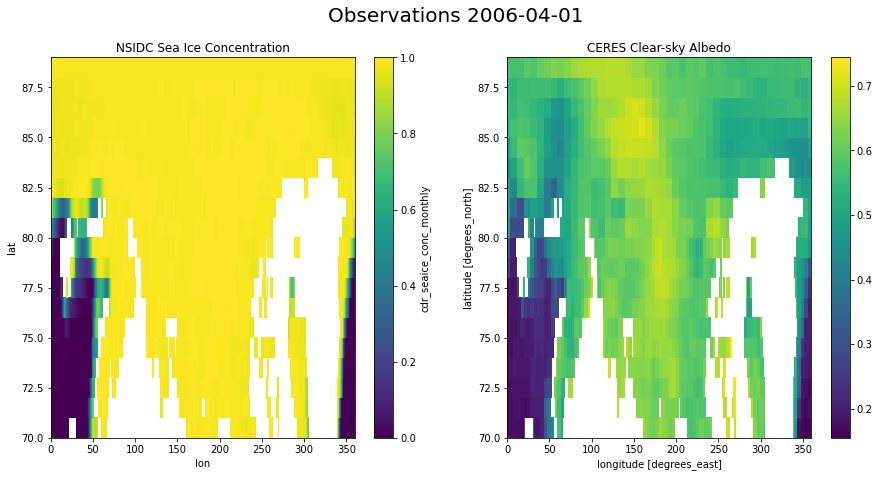

In [1009]:
ii = 36

fig,axs = plt.subplots(1,2,figsize=(15,7))

g02202_final_subset['cdr_seaice_conc_monthly'][ii].plot(ax=axs[0])
albedo_final_subset[ii].plot(ax=axs[1])

axs[0].set_title('NSIDC Sea Ice Concentration')
axs[1].set_title('CERES Clear-sky Albedo')
    
fig.suptitle('Observations 2006-04-01',fontsize=20)

There is an artifact (perhaps from interpolation) at the highest latitude bin. I will remove it before performing the inversion.

In [1010]:
# Remove highest latitude bin.
g02202_final_subset = g02202_final_subset.sel(lat=slice(70,89))
albedo_final_subset = albedo_final_subset.sel(lat=slice(70,89))

## Visualize the Observations

### Add general averaging functions

In [1138]:
# Functions from Abisko 2019 examples
def masked_average(xa:xr.DataArray,
                   dim=None,
                   weights:xr.DataArray=None,
                   mask:xr.DataArray=None):
    """
    This function will average
    :param xa: dataArray
    :param dim: dimension or list of dimensions. e.g. 'lat' or ['lat','lon','time']
    :param weights: weights (as xarray)
    :param mask: mask (as xarray), True where values to be masked.
    :return: masked average xarray
    """
    #lest make a copy of the xa
    with xr.set_options(keep_attrs=True): # testing this
        xa_copy:xr.DataArray = xa.copy()

        if mask is not None:
            xa_weighted_average = __weighted_average_with_mask(
                dim, mask, weights, xa, xa_copy
            )
        elif weights is not None:
            xa_weighted_average = __weighted_average(
                dim, weights, xa, xa_copy
            )
        else:
            xa_weighted_average =  xa.mean(dim)

    return xa_weighted_average


def __weighted_average(dim, weights, xa, xa_copy):
    '''helper function for unmasked_average'''
    _, weights_all_dims = xr.broadcast(xa, weights)  # broadcast to all dims
    x_times_w = xa_copy * weights_all_dims
    xw_sum = x_times_w.sum(dim)
    x_tot = weights_all_dims.where(xa_copy.notnull()).sum(dim=dim)
    xa_weighted_average = xw_sum / x_tot
    return xa_weighted_average


# I want to retain the metadata
def __weighted_average_with_mask(dim, mask, weights, xa, xa_copy):
    '''helper function for masked_average'''
    _, mask_all_dims = xr.broadcast(xa, mask)  # broadcast to all dims
    xa_copy = xa_copy.where(np.logical_not(mask))
    if weights is not None:
        _, weights_all_dims = xr.broadcast(xa, weights)  # broadcast to all dims
        weights_all_dims = weights_all_dims.where(~mask_all_dims)
        x_times_w = xa_copy * weights_all_dims
        xw_sum = x_times_w.sum(dim=dim)
        x_tot = weights_all_dims.where(xa_copy.notnull()).sum(dim=dim)
        xa_weighted_average = xw_sum / x_tot
    else:
        xa_weighted_average = xa_copy.mean(dim)
    return xa_weighted_average

def add_weights(ds):
    '''
    Add variable to ds for weighting of variables. Updated to use xr.broadcast/be more general.
    Test to see if backwards compatible.
    Adding mask argument. (??)
    '''
    
    # Testing new more general code.
    try:
        lat = ds['lat']
    except:
        lat = ds['latitude']

    _gw = np.cos(lat*np.pi/180)

    all_dims = list(ds.dims)

    if 'lon' in all_dims: all_dims.remove('lon') # This could be prettier
    if 'longitude' in all_dims: all_dims.remove('longitude')

    # Broadcast only to lon/longitude if it exists
    _weights,_ = xr.broadcast(_gw,ds,exclude=all_dims)

    # _weights = (_gw @ _ones) / _gw.sum() 
    _weights_norm = _weights / _weights.sum()
    np.testing.assert_allclose(_weights_norm.sum(),1.0)

    new = ds.assign_coords(cell_weight=_weights_norm)
    
    return new

def to_png(file, filename, loc='/glade/u/home/jonahshaw/figures/'):
    '''
    Simple function for one-line saving.
    Saves to "/glade/u/home/jonahshaw/figures" by default
    '''
    output_dir = loc
    ext = 'png'
    full_path = '%s%s.%s' % (output_dir,filename,ext)

    if not os.path.exists(output_dir + filename):
        file.savefig(full_path,format = 'png', dpi = 200)
#         file.clf()
        
    else:
        print('File already exists, rename or delete.')

Add a gridcell weights coordinate to the observational fields.

In [933]:
seaice_all = add_weights(g02202_final_subset['cdr_seaice_conc_monthly'])
albedo_all = add_weights(albedo_final_subset)

Average albedo and sea ice spatially.

In [934]:
albedo_all_avg = masked_average(albedo_all,weights=albedo_all['cell_weight'],dim=['lat','lon'])
seaice_all_avg = masked_average(seaice_all,weights=seaice_all['cell_weight'],dim=['lat','lon'])

Subdivide by month of the year.

In [958]:
seaice_all_avg_mon = seaice_all_avg.groupby('time.month')
albedo_all_avg_mon = albedo_all_avg.groupby('time.month')

Subdivide by year.

In [957]:
seaice_all_avg_yr = seaice_all_avg.groupby('time.year')
albedo_all_avg_yr = albedo_all_avg.groupby('time.year')

#### Produce a similar plot to Pistone et al. (2014)
__How do sea ice fraction and albedo evolve over the course of the melt season? Will this impact how we implement our models?__
Look both at separate months as well evolution over the course of a melt season (2 panels). I could this with a single panel, but it might take a while to figure out.

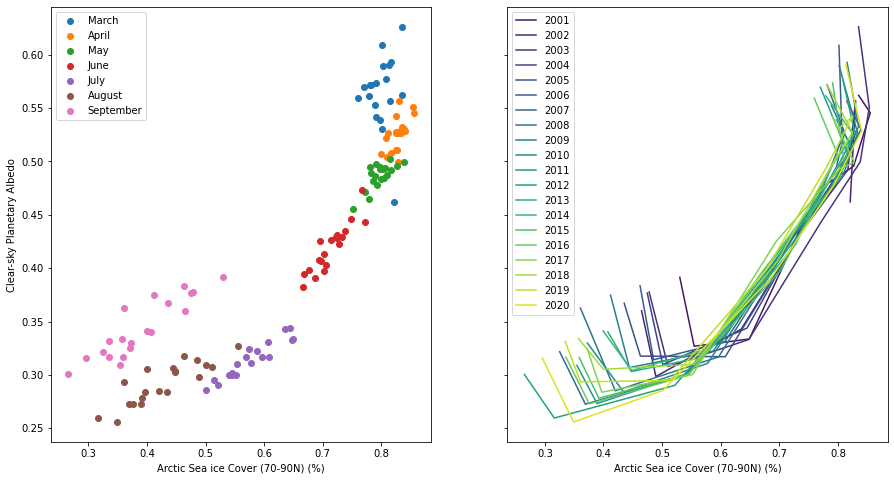

In [988]:
pist_fig,pist_axs = plt.subplots(1,2,figsize=(15,8),sharey=True)

month = ['January','February','March','April','May','June','July','August','September','October','November','December']

for (i,icemon),(j,albedomon) in zip(seaice_all_avg_mon,albedo_all_avg_mon):
    
    pist_axs[0].scatter(icemon,albedomon,label=month[i-1])

pist_axs[0].set_ylabel('Clear-sky Planetary Albedo')
pist_axs[0].set_xlabel('Arctic Sea ice Cover (70-90N) (%)')
pist_axs[0].legend()

yr_palette = sns.color_palette("viridis",n_colors=len(seaice_all_avg_yr))

for (i,iceyr),(j,albedoyr),_color in zip(seaice_all_avg_yr,albedo_all_avg_yr,yr_palette):
    
    pist_axs[1].plot(iceyr,albedoyr,label=str(i),color=_color)
    
pist_axs[1].set_xlabel('Arctic Sea ice Cover (70-90N) (%)')
pist_axs[1].legend()

In [1153]:
to_png(pist_fig,'pistone_redo_proj6670')

Generally, we see albedo fall as sea ice coverage decreases, we the rate decreasing as the sea ice concentration approaches the fall minimum.

These plots look a bit different from Pistone Fig. 2. First, the albedo increase from August to September is more pronounced. Additionally, the decrease in albedo from March through August appears to be more exponential than Pistone Fig. 2. __Since my models can't account for the September albedo increase, I will remove this month from my analysis.__

#### Remove September from albedo and sea ice observations

In [969]:
def is_mamjja(month):
    '''
    Select only months from March through August
    '''
    
    return (month >= 3) & (month <= 8)

In [975]:
seaice_mamjja = seaice_all.sel(time=is_mamjja(seaice_all['time.month']))
albedo_mamjja = albedo_all.sel(time=is_mamjja(albedo_all['time.month']))

## Set up the inverse problem

Stack the ice concenation observations into a 1-d array.

In [992]:
# Create an empty array to house the albedo observations
D1 = np.array(albedo_2001.stack(z=("time", "lat", "lon",)))

#### Clean observations

Remove nan (not a number) values from observations of albedo, and keep track of these indices so that the same fields (i.e lat-lon-month) are also removed from the sea ice observations and the weights.

In [992]:
# Calculate the nans so they can be removed before running the inverse problem.
d1_nan = np.isnan(D1)
d1_notnan_indices = np.asarray(~d1_nan).nonzero()

D1 = D1[d1_notnan_indices[0]] # select only non-nan values

Remove the albedo _nans_ from sea ice observations as well.

In [995]:
stack_fice0 = g02202_2001.stack(z=("time", "lat", "lon",))

stack_fice = stack_fice0[d1_notnan_indices[0]]

Remove the albedo _nans_ from gridcell weights.

In [998]:
stack_weights0 = weights_2001.broadcast_like(albedo_2001).stack(z=("time", "lat", "lon",))
stack_weights = stack_weights0[d1_notnan_indices[0]]

Calculate an idealized diagonal covariance matrix

In [999]:
W1 = np.diag(stack_weights) # create a diagonal covariance matrix with the weights

## Create the forward models, starting with a single year of observations

In [1052]:
g02202_2001 = seaice_mamjja.sel(time=seaice_mamjja['time.year']==2001)
albedo_2001 = albedo_mamjja.sel(time=albedo_mamjja['time.year']==2001)

weights_2001 = albedo_2001['cell_weight']

### Model 0

$$
\left(\begin{array}{cc} 
1-f_{ice_1} & f_{ice_1} \\
1-f_{ice_2} & f_{ice_2} \\
... & ... \\
1-f_{ice_N} & f_{ice_N} \\
\end{array}\right)
\left(\begin{array}{c} 
\alpha_{ocean} \\
\alpha_{ice}
\end{array}\right)
=
\left(\begin{array}{c} 
\alpha_1 \\
\alpha_2 \\
... \\
\alpha_N
\end{array}\right),
$$ 

Create an empty array to house the forward model 0 array

In [1053]:
G0 = np.zeros((stack_fice.shape[0],2))

Fill in values to build the forward model

In [1054]:
G0[:,0] = 1 - stack_fice
G0[:,1] = stack_fice

### Model 1

Model 1:

$$
\left(\begin{array}{ccc} 
1-f_{ice_1} & f_{ice_1}^2 & f_{ice_1} - f_{ice_1}^2 \\
1-f_{ice_2} & f_{ice_2}^2 & f_{ice_2} - f_{ice_2}^2 \\
... & ... & ... \\
1-f_{ice_N} & f_{ice_N}^2 & f_{ice_N} - f_{ice_N}^2 \\
\end{array}\right)
\left(\begin{array}{c} 
\alpha_{ocean} \\
\alpha_{newice} \\
\alpha_{oldice}
\end{array}\right)
=
\left(\begin{array}{c} 
\alpha_1 \\
\alpha_2 \\
... \\
\alpha_N
\end{array}\right)
$$

Create an empty array to house the forward model 1 array

In [1055]:
G1 = np.zeros((stack_fice.shape[0],3))

In [1056]:
G1[:,0] = 1 - stack_fice
G1[:,1] = stack_fice**2
G1[:,2] = stack_fice - stack_fice**2

### Model 2

$$
\left(\begin{array}{ccc} 
1-f_{ice_1} & f_{ice_1} & -f_{ice_1}(t_1 - t_{0,1}) \\
1-f_{ice_2} & f_{ice_2} & -f_{ice_2}(t_2 - t_{0,2}) \\
... & ... & ... \\
1-f_{ice_N} & f_{ice_N} & -f_{ice_N}(t_N - t_{0,N}) \\
\end{array}\right)
\left(\begin{array}{c} 
\alpha_{ocean} \\
\alpha_{newice} \\
(\alpha_{newice}-\alpha_{oldice})/\tau
\end{array}\right)
=
\left(\begin{array}{c} 
\alpha_1 \\
\alpha_2 \\
... \\
\alpha_N
\end{array}\right),
$$ 

#### Define functions for calculating solar insolation from Liou (2002).

I need to do this in order to calculate the melt onset date in the forward model.

In [594]:
def calc_AR2(t):
    '''
    Calculate the square of the ratio between the earth's distance
    and the average orbital distance from the day of the year (t).
    Liou Eqn. 2.2.9.
    '''
    
    A = [1.000110,0.034221,0.000719]
    B = [0,0.001280,0.000077]
    
    out = 0
    for n in range(3):
        out += A[n]*np.cos(n*t) + B[n]*np.sin(n*t)
        
    return out

In [595]:
def calc_delta(t):
    '''
    Calculate the solar inclination angle from the 
    day of the year (t).  
    Liou Eqn. 2.2.10
    '''
    
    C = [0.006918,-0.399912,-0.006758,-0.002697]
    D = [0,0.070257,0.000907,0.000148]
    
    delta = 0
    for n in range(4):
        delta += C[n]*np.cos(n*t) + D[n]*np.sin(n*t)
        
    return delta

In [596]:
def calc_cosH(phi,delta):
    '''
    Calculate the Half Day (H) from 
    the latitude (phi [rad]) and the solar inclination angle (delta [rad])
    Liou Eqn. 2.2.2
    '''
    
    cosH = -1*np.tan(phi)*np.tan(delta)

    cosH = np.where(cosH < -1, -1, cosH)
    cosH = np.where(cosH > 1, 1, cosH)
    
    return cosH

In [597]:
def calc_Q(phi,delta,H, AR2):
    '''
    Calculate the daily insolation from the 
    latitude (phi)
    solar inclination angle (delta)
    Half Day (H)
    orbitting radius ratio (AR2)
    Liou Eqn. 2.2.21
    '''
    S = 1366 # [W/m^2]
    
    inner_left = H*np.sin(phi)*np.sin(delta)
    inner_right = np.cos(phi)*np.cos(delta)*np.sin(H)
    
    
    return S/np.pi * AR2 * (inner_left + inner_right)

In [598]:
def calc_insol(t,phi, robust=False):
    '''
    Call appropriate functions to calculate the daily insolation
    for the day of the year and the latitude.
    '''
    # Convert to radians:
    phi_rad = phi * (np.pi/180)
    t_rad = t * (2*np.pi/365)
    
    if robust: print("phi (rad): ", phi_rad)
    
    delta = calc_delta(t_rad) # Calculate the solar inclination
    if robust: print('delta (rad): ', delta)
    
    AR2 = calc_AR2(t_rad) # Calculate the radius ratio
    if robust: print('AR2: ', AR2)
    
    cosH = calc_cosH(phi_rad,delta) # Calculate the cosine of the half day
    if robust: print('cosH: ', cosH)

    H = np.arccos(cosH) # Convert to the half day
    if robust: print('H (hour): ', 24/np.pi*H)
    
    Q = calc_Q(phi_rad,delta,H,AR2) # Calculate the daily insolation
    
    return Q

In [613]:
ts = np.linspace(1,365,365) # Time steps
ts2 = np.linspace(1,180,180) # Time steps, first half of the year

phis = np.linspace(-90,90,181) # Latitude steps
phis2 = np.linspace(70.5,89.5,20) # Latitude steps

Ts, Phis = np.meshgrid(ts,phis) # meshgrid
Ts2, Phis2 = np.meshgrid(ts2,phis2) # meshgrid

Sols = calc_insol(Ts,Phis) # Insolation!
Sols2 = calc_insol(Ts2,Phis2) # Insolation!

#### Plot a contour map of solar insolation

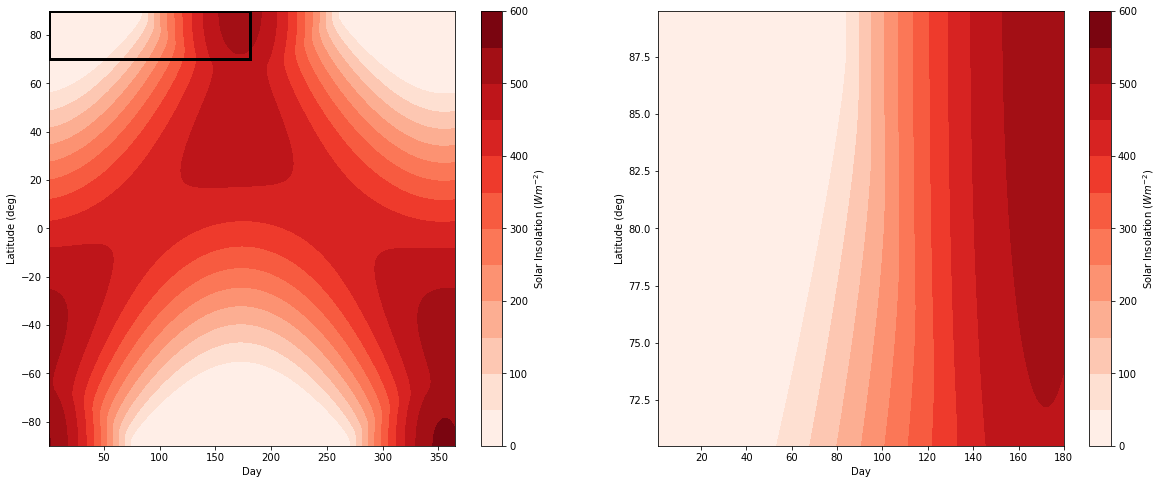

In [614]:
from matplotlib.patches import Rectangle

insol_fig,insol_axs = plt.subplots(1,2,figsize=(20,8))

im0 = insol_axs[0].contourf(ts,phis,Sols,levels=np.linspace(0,600,13),cmap='Reds')
insol_axs[0].set_xlabel('Day')
insol_axs[0].set_ylabel('Latitude (deg)')
plt.colorbar(im0,label=r'Solar Insolation ($Wm^{-2}$)',ax=insol_axs[0])

insol_axs[0].add_patch(Rectangle((1, 70), 180, 20,
             edgecolor = 'black',
             facecolor = 'blue',
             fill=False,
             lw=3))

im1 = insol_axs[1].contourf(ts2,phis2,Sols2,levels=np.linspace(0,600,13),cmap='Reds')
insol_axs[1].set_xlabel('Day')
insol_axs[1].set_ylabel('Latitude (deg)')
plt.colorbar(im1, label=r'Solar Insolation ($Wm^{-2}$)')

In [1151]:
to_png(insol_fig,'insolation_6670proj')

When we subset the Arctic and look at the insolation trends, the contour lines are nearly vertical for higher insolations (roughly insenstive to latitude). But at lower ($<150 \textrm{Wm}^{-2}$) insolation the threshold day is strongly a function of latitude. This supports my use of a latitude-dependent $t_{0,n}$.

#### Test an arbitrary melting threshold

In [41]:
sol_threshold = 50 # [Wm^-2] ice melting threshold

melt_onset = np.argmin(((Sols2 - sol_threshold)**2),axis=1)

array([51, 53, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 77, 79, 80, 82,
       83, 83, 83, 83])

If the melt threshold is $50 \textrm{Wm}^{-2}$, the melt onset date ranges from 51 to 83 days.

To use consistent units for time, convert the month index of sea ice and albedo observations to a day-of-the-year value. Ignore leap years.

In [574]:
# Dictionary converts the month index to the day of the year (for model 2)
monthindex_to_doy = {'3':74,'4':105,'5':135,'6':166,'7':196,'8':227,'9':258}

In [1032]:
# Use list comprehension to query the conversion dictionary and generate array of observation days
dayofobs = np.array([monthindex_to_doy[str(i)] for i in np.array(stack_fice['time.month'])])

Read Sols2 Arctic insolation array into an array dataarray format for easy referencing.

In [627]:
arc_insol_da = xr.DataArray(
    data=Sols2,
    dims=["lat", "dayofyear"],

    coords=dict(
        lat=(np.linspace(70.5,89.5,20)),
        dayofyear=(np.linspace(1,180,180)),
    ),

    attrs=dict(
        description="Solar Insolation.",
        units="Wm-2",
    ),
)

Create a function to return the melt onset day for a latitude value using the solar insolation array. Vectorize to avoid using "for" loops.

In [659]:
# function to return the day of the year when the insolation threshold is reached (closest)
def match_insolation(insol_array,insol_threshold,lat):
    
    return np.argmin(((insol_array.sel(lat=lat) - insol_threshold).values**2))

# Vectorized version
match_insolation_vec = np.vectorize(match_insolation,excluded=[0,1])

#### Write a function to build Model 2 for a specific melt onset insolation threshold

In [1035]:
def model2_meltthreshold(melt_threshold,arc_insol_da,dayofobs,stack_fice):
    '''
    Return the forward model with the melt onset set to a specific insolation
    
    melt_threshold: thresh in Wm^-2 for melt onset
    arc_insol_da: xarray Dataarray with insolation vs. time and latitude in the Arctic
    dayofobs: day of observation
    stack_fice: stacked ice fraction observations
    '''
    
    # Get the day when the threshold is passed
    meltonset_arb_insol = match_insolation_vec(arc_insol_da,melt_threshold,stack_fice['lat'].values)
    
    # Create array of indices of observations when melt has been initiated.
    sunlit_obs = np.asarray((dayofobs - meltonset_arb_insol) > 0).nonzero()[0]
    
    G2_thresh = np.zeros((stack_fice.shape[0],3))
    
    G2_thresh[:,0] = 1 - stack_fice
    G2_thresh[:,1] = stack_fice
    G2_thresh[:,2] = -stack_fice * (dayofobs - meltonset_arb_insol)
    
    # Returns the full array and the subset so that subsetting can be done all in the same place
    return G2_thresh,sunlit_obs

Build the forward model for 4 different melt onset insolation thresholds.

In [1036]:
G2_25, sunlitobs_25  = model2_meltthreshold(25,arc_insol_da,dayofobs,stack_fice)
G2_50, sunlitobs_50  = model2_meltthreshold(50,arc_insol_da,dayofobs,stack_fice)
G2_100,sunlitobs_100 = model2_meltthreshold(100,arc_insol_da,dayofobs,stack_fice)
G2_200,sunlitobs_200 = model2_meltthreshold(200,arc_insol_da,dayofobs,stack_fice)

## Compute predicted values for the forward models using a diagonal covariance matrix

Since the problem is clearly overconstrained (many individual observations and few model parameters), we will employ a weighted least squares solution:  

$$ \textbf{m}^{est} = [\textbf{G}^\textrm{T} \textbf{W}_e \textbf{G}]^{-1} \textbf{G}^\textrm{T} \textbf{W}_e \textbf{d}. $$

Compute a solution using Model 0 and observations from the 2001 melt season.

In [1017]:
%%time

m0_est_diagcov = np.linalg.inv(G0.transpose()@W1@G0)@G0.transpose()@W1@D1

CPU times: user 6.42 s, sys: 30.7 s, total: 37.1 s
Wall time: 3min 49s


In [1018]:
m0_est_diagcov

array([0.18212467, 0.54635733])

These values seem reasonable, cool!

This is really slow (inverting a large matrix takes a long time), so I will see if bootstrapping with subsets of the observations reasonably captures the full solution.

#### Randomly select a subset of observations to see how many points are needed to reasonably capture the entire result.

This is effectively bootstrapping. Because inverting an $N \times N$ matrix is not linear in $N$, it is much faster computationally to invert a smaller matrix with 1% of the entries 100 times and compute a solution using that subset than to calculate the full solution.

In [1057]:
def bootstrap_model1(D1,G,stack_weights):
    '''
    D1: Observations
    G: Forward Model
    stack_weights: diagonal weights
    '''
    tot_obs = D1.shape[0]

    # Randomly pick 1,000 observations
    index_subset = np.random.randint(0, tot_obs, int(1e3))
    D1_subset = D1[index_subset]
    G_subset = G[index_subset,:]
    W1_subset = np.diag(stack_weights[index_subset])
    
    m_est_subset = np.linalg.inv(G_subset.transpose()@W1_subset@G_subset)@G_subset.transpose()@W1_subset@D1_subset
    
    return m_est_subset

Output from a single iteration seems reasonable.

In [1058]:
bootstrap_model1(D1,G0,stack_weights)

array([0.19184073, 0.54677318])

Bootstrap 100 times and average the output.

In [1059]:
bootall_m0 = np.empty((100,2))

for i in range(100):
    
    _bootout = bootstrap_model1(D1,G0,stack_weights)
    
    bootall_m0[i] = _bootout

In [1060]:
bootall_m0.mean(axis=0)

array([0.18189746, 0.54663309])

In [1061]:
bootall_m0.std(axis=0)

array([0.0045917 , 0.00300092])

This approach is far faster and produces output near the full solution.

#### Use bootstrapping for Model 1

Compute a solution using Model 1 and observations from the 2001 melt season.

In [1062]:
bootall_m1 = np.empty((100,3))

for i in range(100):
    
    _bootout = bootstrap_model1(D1,G1,stack_weights)
    
    bootall_m1[i] = _bootout

In [1063]:
bootall_m1.mean(axis=0)

array([0.19584524, 0.55548737, 0.29471871])

In [1064]:
bootall_m1.std(axis=0)

array([0.00530305, 0.00336725, 0.05370419])

The ocean albedo and new ice albedo have small standard deviations, but the old-ice albedo appears to vary quite a bit based on which data is selected. Perhaps there are outliers impacting the solution?

Comparing the output from Model 1 with Model 0, the differences are fairly small. Model 1 predicts a higher ocean albedo 0.194 vs. 0.182, and the "newice" albedo from Model 1 is slightly higher than the standard ice albedo from Model 0. 

#### Use bootstrapping for Model 2

Calculate the predicted values using bootstrapping for the Model 2 variations.

In [1044]:
bootall0 = np.empty((100,3))
bootall25 = np.empty((100,3))
bootall50 = np.empty((100,3))
bootall100 = np.empty((100,3))
bootall200 = np.empty((100,3))

for i in range(100):
    # subset to remove "unlit" observations before feeding into the bootstrapper
    _bootout0  = bootstrap_model1(D1, G2_25,  stack_weights) # This uses all obs
    _bootout25  = bootstrap_model1(D1[sunlitobs_25], G2_25[sunlitobs_25,:],  stack_weights[sunlitobs_25])
    _bootout50  = bootstrap_model1(D1[sunlitobs_50], G2_50[sunlitobs_50,:],  stack_weights[sunlitobs_50])
    _bootout100 = bootstrap_model1(D1[sunlitobs_100],G2_100[sunlitobs_100,:],stack_weights[sunlitobs_100])
    _bootout200 = bootstrap_model1(D1[sunlitobs_200],G2_200[sunlitobs_200,:],stack_weights[sunlitobs_200])
    
    bootall0[i]   = _bootout0
    bootall25[i]  = _bootout25
    bootall50[i]  = _bootout50
    bootall100[i] = _bootout100
    bootall200[i] = _bootout200

In [1045]:
print(np.mean(bootall0,axis=0))
print(np.mean(bootall25,axis=0))
print(np.mean(bootall50,axis=0))
print(np.mean(bootall100,axis=0))
print(np.mean(bootall200,axis=0))

[0.19044636 0.65353202 0.00131551]
[0.19032122 0.65389444 0.00131599]
[0.18954269 0.64605932 0.00133951]
[0.18465776 0.64700694 0.00149537]
[0.17840613 0.62431395 0.00152955]


Increasing the melt onset decreases both the open ocean albedo and the newice albedo. The first should not change, but it would make sense for the newice albedo to decrease because we are only letting the model look at later observations where the albedo has already started to decrease. But ultimately the albedos only change by a few percent. This is mostly just the effect of using a subset of data that is later in the melt season.

What is the probability that a single observation will not be selected in 100 iterations of 1000 random observations?

In [1117]:
(1 - 1000/43200)**100

0.09613253941271083

It is less than 10%, which is probably good enough. I could easily increase the number of bootstrapping iterations.

### Calculate Error relative to observations (evaluate model performance)

Even when predicting over the entire observational field (not excluding observations where melt is not onset), all the variants of model 3 perform effectively the same.

#### Write a function to compute an area-weighted RMS error

In [847]:
def weighted_rmse(obs,preds,weights,subset=None):
    '''
    Calculate a weighted RMSE:
    '''
    # Handle checking only a subset of observations.
    if subset:
        weights_subset = weights[subset]
    else:
        weights_subset = weights

    # weighting requires normalized weights
    weights = weights_subset / np.sum(weights_subset)
    np.testing.assert_allclose(np.sum(weights),1)

    rmse = np.sqrt(np.sum(weights*(obs - preds)**2)) # computed weighted RMSE
    
    return rmse

#### Use the various forward models and their solutions to predict albedo

In [1065]:
# Predict observations from the first model
predict_obs_M0 = (G0).dot(np.mean(bootall_m0,axis=0).T)

In [1066]:
# Predict observations from the first model
predict_obs_M1 = (G1).dot(np.mean(bootall_m1,axis=0).T)

In [1046]:
predict_obs_M2_0   = (G2_25).dot(np.mean(bootall0,axis=0).T)
predict_obs_M2_25  = (G2_25).dot(np.mean(bootall25,axis=0).T)
predict_obs_M2_50  = (G2_50).dot(np.mean(bootall50,axis=0).T)
predict_obs_M2_100 = (G2_100).dot(np.mean(bootall100,axis=0).T)
predict_obs_M2_200 = (G2_200).dot(np.mean(bootall200,axis=0).T)

#### Calculate the RMS error for each forward model

In [1067]:
rmse_m0   = weighted_rmse(D1,predict_obs_M0,stack_weights)

In [1068]:
rmse_m1   = weighted_rmse(D1,predict_obs_M1,stack_weights)

In [1050]:
rmse_m2_0   = weighted_rmse(D1,predict_obs_M2_0,stack_weights)
rmse_m2_25  = weighted_rmse(D1,predict_obs_M2_25,stack_weights)
rmse_m2_50  = weighted_rmse(D1,predict_obs_M2_50,stack_weights)
rmse_m2_100 = weighted_rmse(D1,predict_obs_M2_100,stack_weights)
rmse_m2_200 = weighted_rmse(D1,predict_obs_M2_200,stack_weights)

__How well do the different models perform?__

In [1069]:
print('RMSE Model 0: %.4f' % rmse_m0.values)
print('RMSE Model 1: %.4f' % rmse_m1.values)

print('RMSE Model 2, no threshold: %.4f' % rmse_m2_0.values)
print('RMSE Model 2, 25 Wm-2 threshold: %.4f' % rmse_m2_25.values)
print('RMSE Model 2, 50 Wm-2 threshold: %.4f' % rmse_m2_50.values)
print('RMSE Model 2, 100 Wm-2 threshold: %.4f' % rmse_m2_100.values)
print('RMSE Model 2, 200 Wm-2 threshold: %.4f' % rmse_m2_200.values)

RMSE Model 0: 0.0762
RMSE Model 1: 0.0745
RMSE Model 2, no threshold: 0.0544
RMSE Model 2, 25 Wm-2 threshold: 0.0544
RMSE Model 2, 50 Wm-2 threshold: 0.0540
RMSE Model 2, 100 Wm-2 threshold: 0.0542
RMSE Model 2, 200 Wm-2 threshold: 0.0542


#### Takeaways

1. Model 1 performs no better than our zeroeth order model.

2. Model 2 performs significantly better than both Model 0 and Model 1, indicating that albedo degrading with time after melt onset is present in observations.

3. All variants of Model 2 with different melt onsets perform comparably. Perhaps the $50\textrm{Wm}^{-2}$ threshold is slightly better, but probably not.

### Plot Model Error in different months to understand biases

#### Unstack predicted values back to an xarray grid to evaluate biases from a spatial and temporal perspective

In [1070]:
stack_fice_copy = stack_fice.copy()

stack_fice_copy.values = predict_obs_M1

stack_fice_copy.name = 'M1 albedo predictions'

m1_preds_da = stack_fice_copy.unstack()

In [1071]:
stack_fice_copy = stack_fice.copy()

stack_fice_copy.values = predict_obs_M0

stack_fice_copy.name = 'M0 albedo predictions'

m0_preds_da = stack_fice_copy.unstack()

In [1072]:
stack_fice_copy = stack_fice.copy()

stack_fice_copy.values = predict_obs_M2_0

stack_fice_copy.name = 'M2_0 albedo predictions'

m2_0_preds_da = stack_fice_copy.unstack()

#### Plot predictions for each model

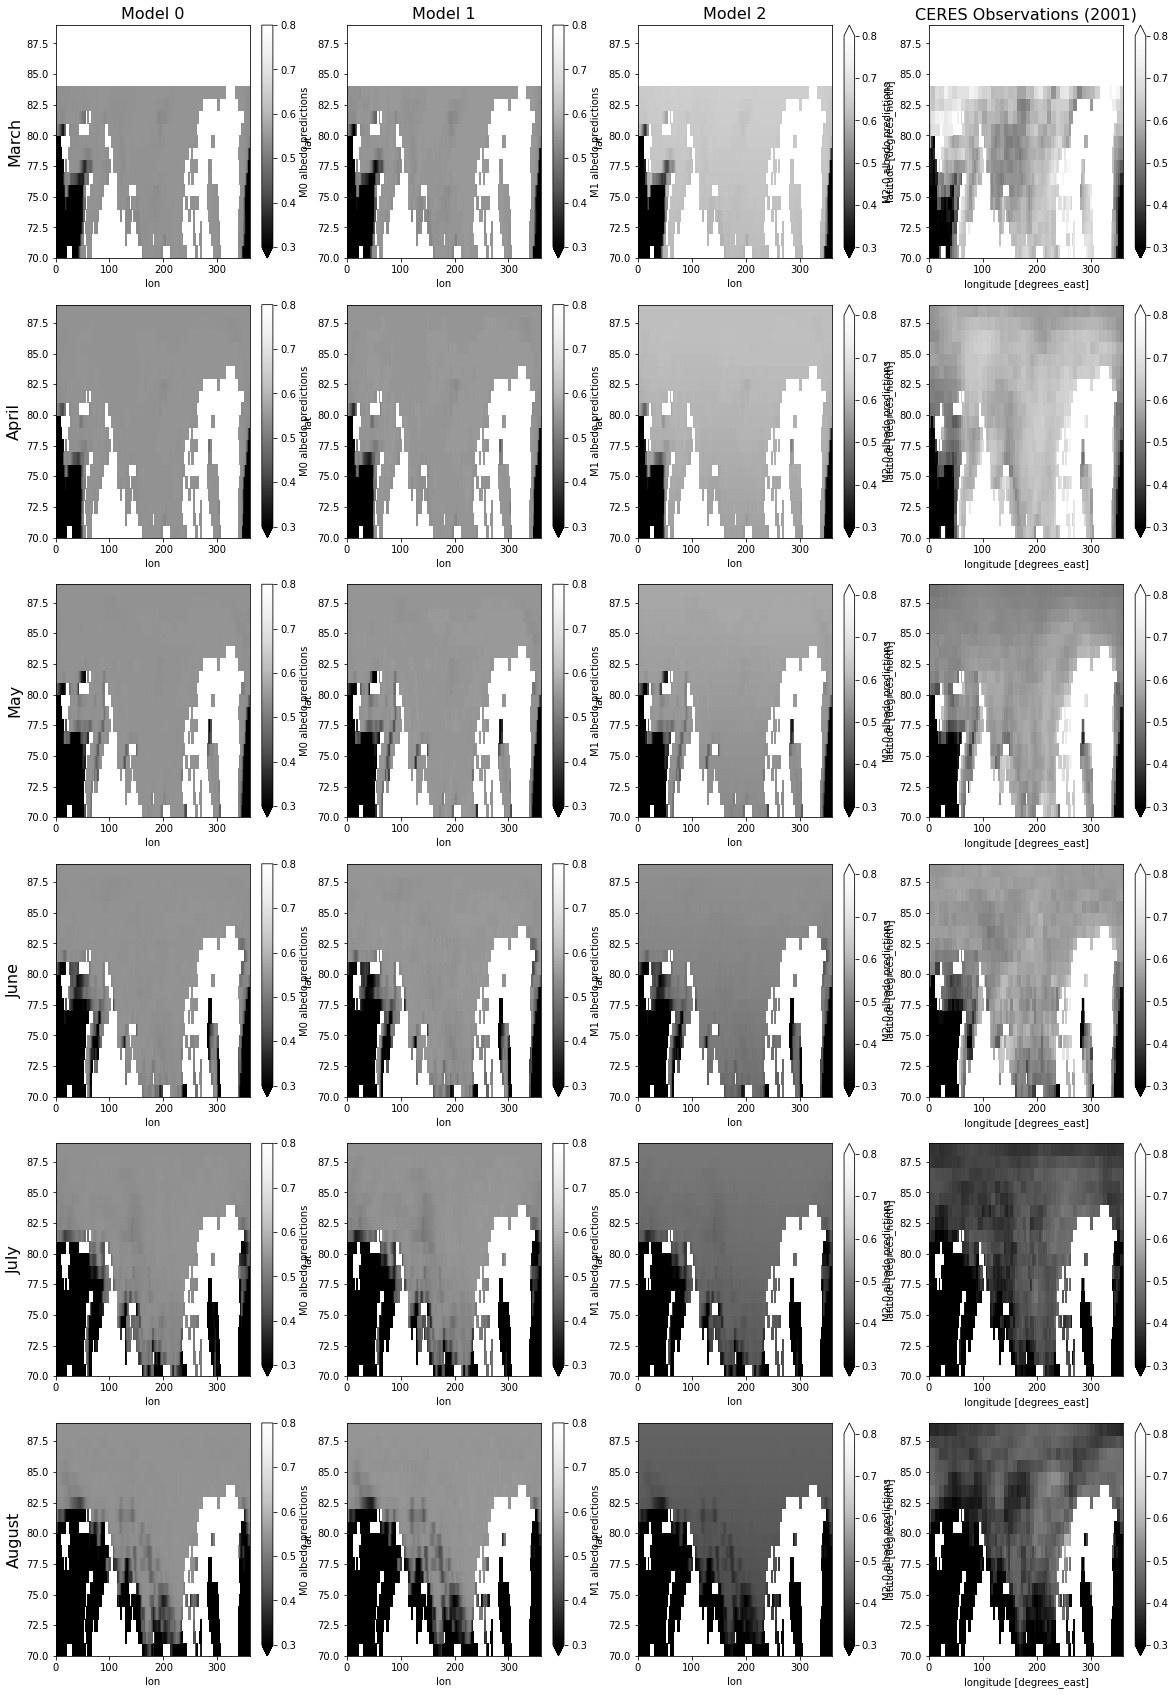

In [1144]:
m0_preds_da['time'] = albedo_2001['time']
m1_preds_da['time'] = albedo_2001['time']
m2_0_preds_da['time'] = albedo_2001['time']

fig,axs = plt.subplots(6,4,figsize=(20,30))

for _month,_ax in zip(m0_preds_da,axs[:,0]):
    _month.plot(ax=_ax,vmin=0.3,vmax=0.8,cmap='Greys_r')
    _ax.set_title('')
axs[0,0].set_title('Model 0',fontsize=16)
    
for _month,_ax in zip(m1_preds_da,axs[:,1]):
    _month.plot(ax=_ax,vmin=0.3,vmax=0.8,cmap='Greys_r')
    _ax.set_title('')
axs[0,1].set_title('Model 1',fontsize=16)

for _month,_ax in zip(m2_0_preds_da,axs[:,2]):
    _month.plot(ax=_ax,vmin=0.3,vmax=0.8,cmap='Greys_r',extend='both')
    _ax.set_title('')
axs[0,2].set_title('Model 2',fontsize=16)

for _month,_ax in zip(albedo_2001,axs[:,3]):
    _month.plot(ax=_ax,vmin=0.3,vmax=0.8,cmap='Greys_r',extend='both')
    _ax.set_title('')
axs[0,3].set_title('CERES Observations (2001)',fontsize=16)

months = ['March','April','May','June','July','August']
for _axs,_month in zip(axs[:,0],months):
    _axs.set_ylabel(_month,fontsize=16)

# fig.suptitle('Modelled Albedo',fontsize=20,y=0.9)

#### Plot biases for each model

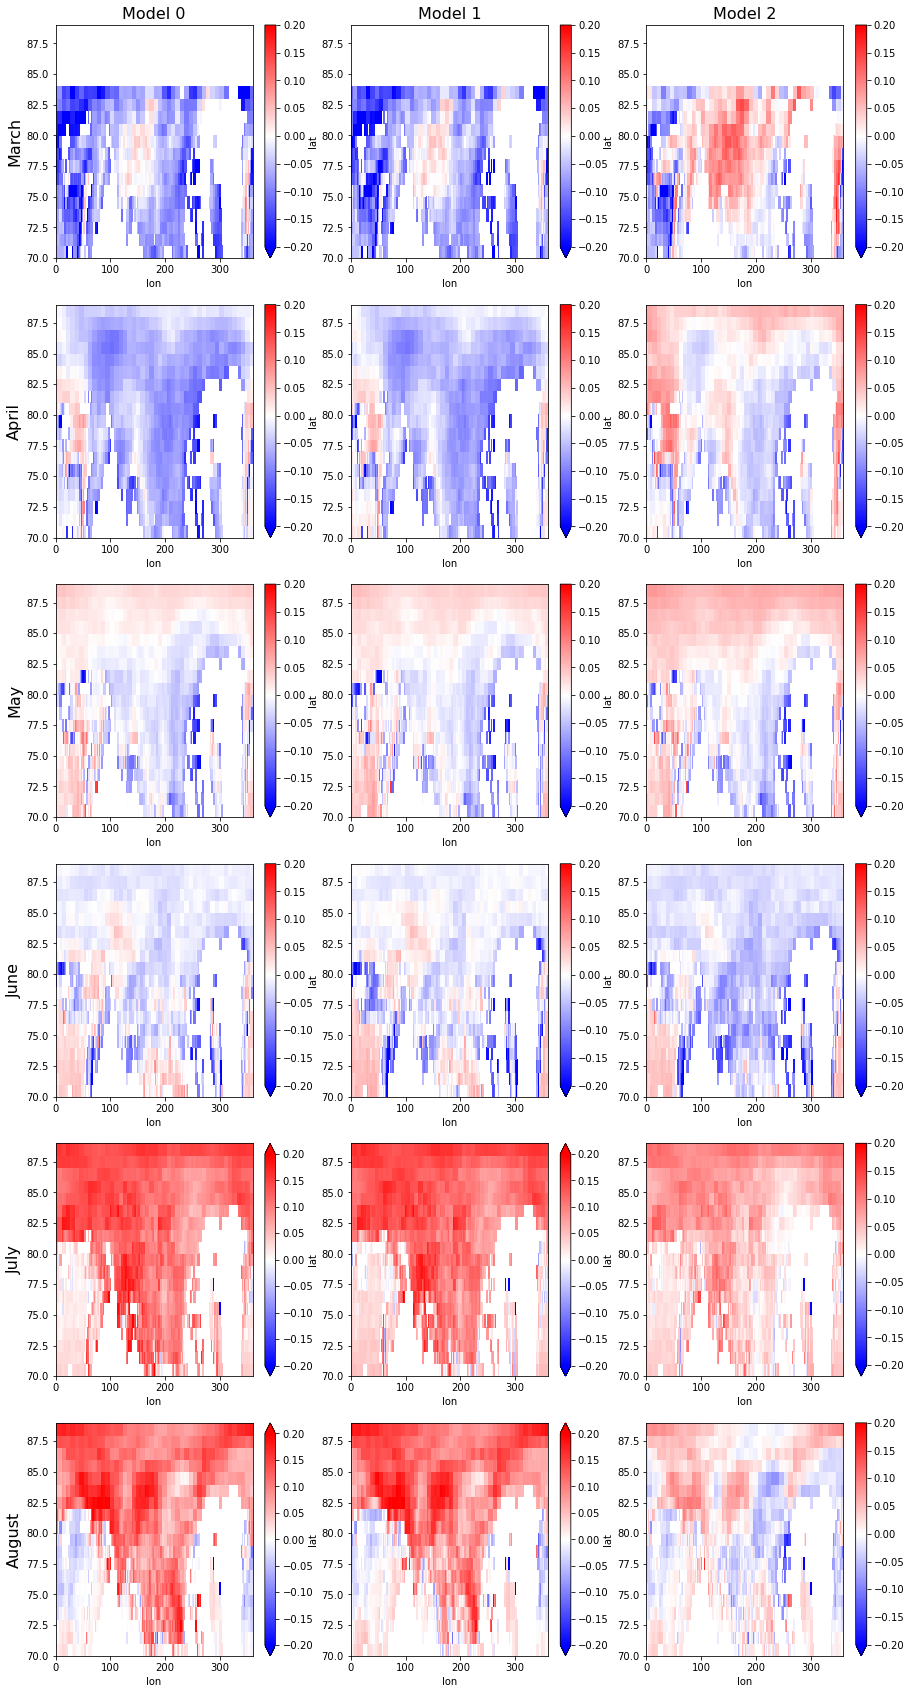

In [1145]:
m0_preds_da['time'] = albedo_2001['time']
m1_preds_da['time'] = albedo_2001['time']
m2_0_preds_da['time'] = albedo_2001['time']

m0_bias = m0_preds_da - albedo_2001
m1_bias = m1_preds_da - albedo_2001
m2_0_bias = m2_0_preds_da - albedo_2001

fig,axs = plt.subplots(6,3,figsize=(15,30))

for _month,_ax in zip(m0_bias,axs[:,0]):
    _month.plot(ax=_ax,vmin=-0.2,vmax=0.2,cmap='bwr')
    _ax.set_title('')
axs[0,0].set_title('Model 0',fontsize=16)
    
for _month,_ax in zip(m1_bias,axs[:,1]):
    _month.plot(ax=_ax,vmin=-0.2,vmax=0.2,cmap='bwr')
    _ax.set_title('')
axs[0,1].set_title('Model 1',fontsize=16)

for _month,_ax in zip(m2_0_bias,axs[:,2]):
    _month.plot(ax=_ax,vmin=-0.2,vmax=0.2,cmap='bwr')
    _ax.set_title('')
axs[0,2].set_title('Model 2',fontsize=16)

months = ['March','April','May','June','July','August']
for _axs,_month in zip(axs[:,0],months):
    _axs.set_ylabel(_month,fontsize=16)
    _ax.set_title('')

# fig.suptitle('Model Biases',fontsize=20,y=0.9)

In [1148]:
to_png(fig,'albedo_biase_6670proj')

#### Finally visualize the sea ice fraction albedo relationship

Compute observation averages

In [1104]:
seaice_2001_avg = seaice_all_avg.sel(time=slice('2001-01-01','2001-08-31'))
albedo_2001_avg = albedo_all_avg.sel(time=slice('2001-01-01','2001-08-31'))

Compute model averages

In [1112]:
m0_2001preds_avg   = masked_average(m0_preds_da,weights=m0_preds_da['cell_weight'],dim=['lat','lon'])
m1_2001preds_avg   = masked_average(m1_preds_da,weights=m1_preds_da['cell_weight'],dim=['lat','lon'])
m2_0_2001preds_avg = masked_average(m2_0_preds_da,weights=m2_0_preds_da['cell_weight'],dim=['lat','lon'])

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


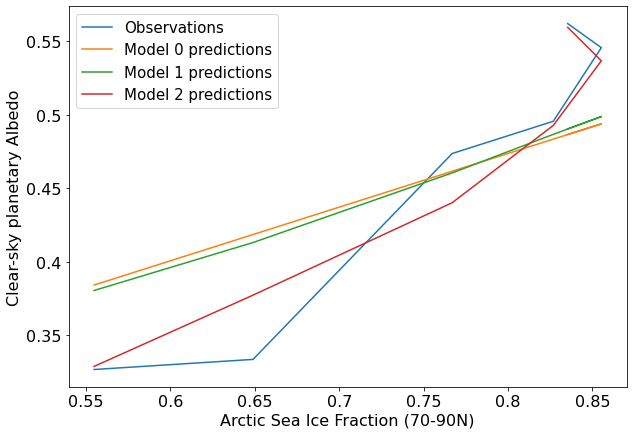

In [1137]:
finalfig,finalax = plt.subplots(1,1,figsize=(10,7))

finalax.plot(seaice_2001_avg,albedo_2001_avg,   label='Observations')
finalax.plot(seaice_2001_avg,m0_2001preds_avg,  label='Model 0 predictions')
finalax.plot(seaice_2001_avg,m1_2001preds_avg,  label='Model 1 predictions')
finalax.plot(seaice_2001_avg,m2_0_2001preds_avg,label='Model 2 predictions')

finalax.set_xlabel('Arctic Sea Ice Fraction (70-90N)',fontsize=16)
finalax.set_ylabel('Clear-sky planetary Albedo',fontsize=16)
finalax.set_xticklabels(np.round(finalax.get_xticks(),2),fontsize=16)
finalax.set_yticklabels(np.round(finalax.get_yticks(),2),fontsize=16)

plt.legend(fontsize=15)

In [1149]:
to_png(finalfig,'lineplot_comparison_6670proj')

In [ ]:
# Loaded save timeseries or process them from Brian Medeiros' monthly data
if os.path.exists('%s/CERES_EBAF_Ed4.1_ASR_200003-202102.nc' % ceres_savedir):
    ceres_asr = xr.open_dataset('%s/CERES_EBAF_Ed4.1_ASR_200003-202102.nc' % ceres_savedir)
    
if os.path.exists('%s/CERES_EBAF_Ed4.1_OLR_200003-202102.nc' % ceres_savedir):
    ceres_olr = xr.open_dataset('%s/CERES_EBAF_Ed4.1_OLR_200003-202102.nc' % ceres_savedir)

if (not os.path.exists('%s/CERES_EBAF_Ed4.1_OLR_200003-202102.nc' % ceres_savedir)) or (not os.path.exists('%s/CERES_EBAF_Ed4.1_ASR_200003-202102.nc' % ceres_savedir)):    
    all_ceres = xr.open_mfdataset(ceres_files)
    
    if not os.path.exists('%s/CERES_EBAF_Ed4.1_ASR_200003-202102.nc' % ceres_savedir):
        ceres_asr = all_ceres['solar_mon'] - all_ceres['toa_sw_all_mon']
        
    if not os.path.exists('%s/CERES_EBAF_Ed4.1_OLR_200003-202102.nc' % ceres_savedir):
        ceres_olr = all_ceres['toa_lw_all_mon']

ceres_dir = '